Oppgave til forelesing 2

In [ ]:
using LinearAlgebra # Nødvendig for å regne ut lengden på gradienten: norm()

# 1. Definer funksjonen og gradienten (Rosenbrock)
f(x) = (1 - x[1])^2 + 100 * (x[2] - x[1]^2)^2

function ∇f(x)
    df_dx = -2 * (1 - x[1]) - 400 * x[1] * (x[2] - x[1]^2)
    df_dy = 200 * (x[2] - x[1]^2)
    return [df_dx, df_dy]
end

# 2. Selve Gradient Descent-funksjonen
function gradient_descent_backtracking(x_start)
    x = x_start
    β = 0.5       # Hvor mye vi krymper skrittet (Backtracking-faktor) [cite: 495]
    tol = 1e-6    # Hvor nøyaktig vi vil være [cite: 336]
    
    for k in 1:10000
        grad = ∇f(x)
        d = -grad # Retningen er nedoverbakke [cite: 493]
        
        # --- START BACKTRACKING ---
        α = 1.0   # Vi starter med et langt skritt [cite: 494]
        
        # Mens den nye verdien IKKE er lavere enn den gamle, gjør skrittet kortere
        while f(x + α * d) >= f(x)
            α = α * β  # Krymp skrittet [cite: 495]
            
            # Sikkerhetsventil så vi ikke havner i evig løkke
            if α < 1e-12
                break
            end
        end
        # --- SLUTT BACKTRACKING ---
        
        # Ta det faktiske skrittet
        x_new = x + α * d [cite: 495]
        
        # Sjekk om vi er ferdige (er det flatt nok?) 
        if norm(grad) < tol
            println("Ferdig etter $k iterasjoner!")
            return x_new
        end
        
        x = x_new
    end
    return x
end

# Kjør koden
start_punkt = [0.0, 0.0]
resultat = gradient_descent_backtracking(start_punkt)
println("Minimum funnet ved: ", resultat)


Iter | f(x)      | ||∇f||    | Step Size
---------------------------------------------
   1 |   1.0000 |   2.0000 | 0.000200
1000 |   0.6816 |   1.5581 | 0.000156
2000 |   0.4929 |   1.2044 | 0.000120
3000 |   0.3761 |   0.9684 | 0.000097
4000 |   0.2980 |   0.8066 | 0.000081
5000 |   0.2423 |   0.6895 | 0.000069
6000 |   0.2009 |   0.6008 | 0.000060
7000 |   0.1690 |   0.5311 | 0.000053
8000 |   0.1437 |   0.4748 | 0.000047
9000 |   0.1234 |   0.4282 | 0.000043
10000 |   0.1067 |   0.3889 | 0.000039
11000 |   0.0929 |   0.3554 | 0.000036
12000 |   0.0813 |   0.3264 | 0.000033
13000 |   0.0715 |   0.3010 | 0.000030
14000 |   0.0631 |   0.2785 | 0.000028
15000 |   0.0559 |   0.2586 | 0.000026
16000 |   0.0496 |   0.2408 | 0.000024
17000 |   0.0442 |   0.2247 | 0.000022
18000 |   0.0395 |   0.2102 | 0.000021
19000 |   0.0354 |   0.1970 | 0.000020
20000 |   0.0317 |   0.1849 | 0.000018
21000 |   0.0285 |   0.1738 | 0.000017
22000 |   0.0257 |   0.1637 | 0.000016
23000 |   0.0231 |   0.154

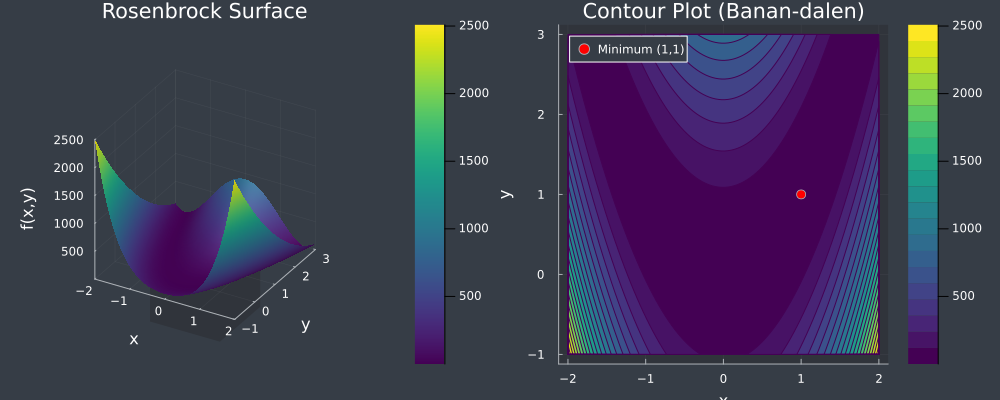

In [46]:
using Plots
# Bruk pyplot() eller gr() backend for interaktive 3D-plot
gr() 

# Definer funksjonen 
f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2

# Lag et rutenett for visualisering
x_vals = range(-2, 2, length=100)
y_vals = range(-1, 3, length=100)

# Lag 3D overflateplot
p1 = surface(x_vals, y_vals, f, 
    title = "Rosenbrock Surface",
    xlabel = "x", ylabel = "y", zlabel = "f(x,y)",
    camera = (30, 30), # Juster vinkelen for å se dalen bedre
    color = :viridis,
    colorbar = true)

# Lag konturplot
p2 = contour(x_vals, y_vals, f, 
    levels = 20, 
    title = "Contour Plot (Banan-dalen)",
    xlabel = "x", ylabel = "y",
    fill = true, 
    color = :viridis)

# Marker det globale minimumet i (1, 1)
scatter!([1], [1], color=:red, label="Minimum (1,1)", markersize=5)

# Vis begge plottene samtidig
plot(p1, p2, layout = (1, 2), size = (1000, 400))